In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [237]:
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')
sub=pd.read_csv('./titanic/gender_submission.csv')

In [238]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [239]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [240]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [241]:
# data preprocessing & feature engineering 

full_data = [train, test]

for dataset in full_data:
    
    dataset['Ticket_type'] = dataset['Ticket'].apply(lambda x: x[0:3])
    dataset['Ticket_type'] = dataset['Ticket_type'].astype('category')
    dataset['Ticket_type'] = dataset['Ticket_type'].cat.codes
    
    dataset['Words_Count'] = dataset['Name'].apply(lambda x: len(x.split()))
    
    dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
    
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
    
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
    dataset['Title'] = dataset['Name'].apply(get_title)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int) # mapping sex
    
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 

C:\Users\Milad\AppData\Local\Temp/ipykernel_17816/3060123638.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
C:\Users\Milad\AppData\Local\Temp/ipykernel_17816/3060123638.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list


In [242]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

In [243]:
train.tail()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Ticket_type,Words_Count,Has_Cabin,FamilySize,IsAlone,Title
886,0,2,1,1,0,1,0,23,3,0,1,1,5
887,1,1,0,1,0,2,0,2,4,1,1,1,2
888,0,3,0,2,2,2,0,150,5,0,4,0,2
889,1,1,1,1,0,2,1,1,4,1,1,1,1
890,0,3,1,1,0,0,2,94,3,0,1,1,1


In [244]:
test.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,Ticket_type,Words_Count,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,2,0,0,2,58,3,0,1,1,1
1,3,0,2,0,0,0,71,5,0,2,0,3
2,2,1,3,0,1,2,32,4,0,1,1,1
3,3,1,1,0,1,0,55,3,0,1,1,1
4,3,0,1,1,1,0,54,6,0,3,0,3


In [245]:
X=train.drop("Survived",axis=1).values
y=train["Survived"].values

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=101)

In [248]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [249]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test_scaled=scaler.transform(test)

In [250]:
# Creating the Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [251]:
model = Sequential()
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))
# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(units=1,activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [252]:
#Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.
model.fit(x=X_train, 
          y=y_train, 
          epochs=1000,
          batch_size=100,
          validation_data=(X_test, y_test), 
          )

Epoch 1/1000
9/9 [==============================] - 1s 21ms/step - loss: 0.6939 - val_loss: 0.6718
Epoch 2/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.6510 - val_loss: 0.6530
Epoch 3/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.6255 - val_loss: 0.6299
Epoch 4/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.5900 - val_loss: 0.5994
Epoch 5/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.5769 - val_loss: 0.5551
Epoch 6/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.5430 - val_loss: 0.5161
Epoch 7/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.5327 - val_loss: 0.4835
Epoch 8/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.5045 - val_loss: 0.4725
Epoch 9/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.5020 - val_loss: 0.4506
Epoch 10/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.4924 - val_loss: 0.4413
Epoch 11/1000
9/9 

9/9 [==============================] - 0s 5ms/step - loss: 0.3759 - val_loss: 0.3983
Epoch 84/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.3758 - val_loss: 0.3943
Epoch 85/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.3830 - val_loss: 0.3900
Epoch 86/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.3747 - val_loss: 0.3937
Epoch 87/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.3728 - val_loss: 0.3935
Epoch 88/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.3694 - val_loss: 0.3925
Epoch 89/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3775 - val_loss: 0.3945
Epoch 90/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.3753 - val_loss: 0.3915
Epoch 91/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3676 - val_loss: 0.3962
Epoch 92/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.3803 - val_loss: 0.4032
Epoch 93/1000
9/9 [=====

9/9 [==============================] - 0s 4ms/step - loss: 0.3310 - val_loss: 0.3897
Epoch 165/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3356 - val_loss: 0.3824
Epoch 166/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3320 - val_loss: 0.4003
Epoch 167/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3298 - val_loss: 0.3989
Epoch 168/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.3374 - val_loss: 0.3867
Epoch 169/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.3240 - val_loss: 0.3835
Epoch 170/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3421 - val_loss: 0.3879
Epoch 171/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3259 - val_loss: 0.3912
Epoch 172/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.3330 - val_loss: 0.4000
Epoch 173/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.3326 - val_loss: 0.3997
Epoch 174/1000


9/9 [==============================] - 0s 5ms/step - loss: 0.3011 - val_loss: 0.3992
Epoch 246/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.3004 - val_loss: 0.3752
Epoch 247/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2989 - val_loss: 0.3839
Epoch 248/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3128 - val_loss: 0.3866
Epoch 249/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3136 - val_loss: 0.3770
Epoch 250/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3046 - val_loss: 0.3861
Epoch 251/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3225 - val_loss: 0.3911
Epoch 252/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2996 - val_loss: 0.4322
Epoch 253/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2965 - val_loss: 0.4251
Epoch 254/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3085 - val_loss: 0.4142
Epoch 255/1000


9/9 [==============================] - 0s 4ms/step - loss: 0.2791 - val_loss: 0.4065
Epoch 327/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2776 - val_loss: 0.3922
Epoch 328/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2839 - val_loss: 0.3717
Epoch 329/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2906 - val_loss: 0.3491
Epoch 330/1000
9/9 [==============================] - ETA: 0s - loss: 0.214 - 0s 4ms/step - loss: 0.2672 - val_loss: 0.3708
Epoch 331/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2913 - val_loss: 0.3749
Epoch 332/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2877 - val_loss: 0.3671
Epoch 333/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2827 - val_loss: 0.3674
Epoch 334/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2830 - val_loss: 0.4200
Epoch 335/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2926 - val_loss

9/9 [==============================] - 0s 4ms/step - loss: 0.2617 - val_loss: 0.4034
Epoch 408/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2553 - val_loss: 0.3749
Epoch 409/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2553 - val_loss: 0.3699
Epoch 410/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2619 - val_loss: 0.4010
Epoch 411/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2553 - val_loss: 0.3845
Epoch 412/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2648 - val_loss: 0.3972
Epoch 413/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2459 - val_loss: 0.3777
Epoch 414/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2653 - val_loss: 0.3727
Epoch 415/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2509 - val_loss: 0.3890
Epoch 416/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2504 - val_loss: 0.4009
Epoch 417/1000


9/9 [==============================] - 0s 5ms/step - loss: 0.2510 - val_loss: 0.4645
Epoch 489/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2487 - val_loss: 0.4051
Epoch 490/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2442 - val_loss: 0.3846
Epoch 491/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2517 - val_loss: 0.3755
Epoch 492/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2453 - val_loss: 0.4172
Epoch 493/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2563 - val_loss: 0.4172
Epoch 494/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2458 - val_loss: 0.4152
Epoch 495/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2388 - val_loss: 0.4421
Epoch 496/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2357 - val_loss: 0.4153
Epoch 497/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2561 - val_loss: 0.4049
Epoch 498/1000


9/9 [==============================] - 0s 4ms/step - loss: 0.2236 - val_loss: 0.4511
Epoch 570/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2352 - val_loss: 0.4517
Epoch 571/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2235 - val_loss: 0.4967
Epoch 572/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2093 - val_loss: 0.4385
Epoch 573/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2278 - val_loss: 0.4124
Epoch 574/1000
9/9 [==============================] - ETA: 0s - loss: 0.139 - 0s 4ms/step - loss: 0.2171 - val_loss: 0.4306
Epoch 575/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2196 - val_loss: 0.4367
Epoch 576/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2143 - val_loss: 0.4586
Epoch 577/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2264 - val_loss: 0.4783
Epoch 578/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2258 - val_loss

9/9 [==============================] - 0s 4ms/step - loss: 0.2107 - val_loss: 0.4827
Epoch 651/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2052 - val_loss: 0.5070
Epoch 652/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2084 - val_loss: 0.4939
Epoch 653/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2214 - val_loss: 0.5192
Epoch 654/1000
9/9 [==============================] - ETA: 0s - loss: 0.263 - 0s 5ms/step - loss: 0.2284 - val_loss: 0.5025
Epoch 655/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2137 - val_loss: 0.4451
Epoch 656/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2162 - val_loss: 0.4687
Epoch 657/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2048 - val_loss: 0.4984
Epoch 658/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2206 - val_loss: 0.4846
Epoch 659/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2224 - val_loss

9/9 [==============================] - 0s 6ms/step - loss: 0.2092 - val_loss: 0.5193
Epoch 731/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2032 - val_loss: 0.5016
Epoch 732/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2090 - val_loss: 0.5140
Epoch 733/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1996 - val_loss: 0.4842
Epoch 734/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2021 - val_loss: 0.4502
Epoch 735/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2024 - val_loss: 0.4712
Epoch 736/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2148 - val_loss: 0.4922
Epoch 737/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2021 - val_loss: 0.4666
Epoch 738/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2088 - val_loss: 0.4768
Epoch 739/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1999 - val_loss: 0.5140
Epoch 740/1000


Epoch 812/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1943 - val_loss: 0.5812
Epoch 813/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1898 - val_loss: 0.5500
Epoch 814/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1899 - val_loss: 0.5523
Epoch 815/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2099 - val_loss: 0.5374
Epoch 816/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1946 - val_loss: 0.5409
Epoch 817/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1891 - val_loss: 0.5271
Epoch 818/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2027 - val_loss: 0.5703
Epoch 819/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1910 - val_loss: 0.5579
Epoch 820/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2010 - val_loss: 0.5397
Epoch 821/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2008 - val_loss: 0.5529


9/9 [==============================] - 0s 4ms/step - loss: 0.1768 - val_loss: 0.6241
Epoch 894/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1812 - val_loss: 0.6057
Epoch 895/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1935 - val_loss: 0.5964
Epoch 896/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1791 - val_loss: 0.5968
Epoch 897/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2091 - val_loss: 0.5891
Epoch 898/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1887 - val_loss: 0.5777
Epoch 899/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1950 - val_loss: 0.5553
Epoch 900/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1946 - val_loss: 0.5248
Epoch 901/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1923 - val_loss: 0.5145
Epoch 902/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1881 - val_loss: 0.5488
Epoch 903/1000


9/9 [==============================] - 0s 5ms/step - loss: 0.1811 - val_loss: 0.5295
Epoch 975/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1844 - val_loss: 0.5254
Epoch 976/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1728 - val_loss: 0.5751
Epoch 977/1000
9/9 [==============================] - ETA: 0s - loss: 0.128 - 0s 5ms/step - loss: 0.1910 - val_loss: 0.5940
Epoch 978/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1746 - val_loss: 0.5980
Epoch 979/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1656 - val_loss: 0.5921
Epoch 980/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1931 - val_loss: 0.5858
Epoch 981/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1797 - val_loss: 0.5428
Epoch 982/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1750 - val_loss: 0.5875
Epoch 983/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1761 - val_loss

<AxesSubplot:>

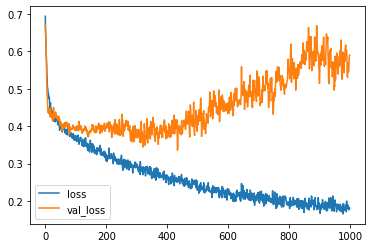

In [253]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [254]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85        24
           1       0.93      0.67      0.78        21

    accuracy                           0.82        45
   macro avg       0.85      0.81      0.81        45
weighted avg       0.84      0.82      0.82        45



In [255]:
confusion_matrix(y_test,predictions)

array([[23,  1],
       [ 7, 14]], dtype=int64)

In [256]:
sub['Survived']=(model.predict(test) > 0.5).astype("int32")

In [257]:
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,1
416,1308,1


In [258]:
sub.to_csv('submission_first.csv', index=False)

In [261]:
# random forest model

y_train = train['Survived'].ravel()
train = train.drop(['Survived'], axis=1)
x_train = train.values # Creates an array of the train data
x_test = test.values 


from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',
                            n_estimators=1750,
                            max_depth=7,
                            min_samples_split=6,
                            min_samples_leaf=6,
                            max_features='auto',
                            oob_score=True,
                            random_state=0,
                            n_jobs=-1,
                            verbose=1)
rf.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    1.7s finished


RandomForestClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=6,
                       n_estimators=1750, n_jobs=-1, oob_score=True,
                       random_state=0, verbose=1)

In [265]:
sub['Survived']=rf.predict(x_test)
sub

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 1750 out of 1750 | elapsed:    0.4s finished


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [266]:
sub.to_csv('submission_second.csv', index=False)